In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-070fd5d89218>:36: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
<ipython-input-2-070fd5d89218>:36: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
<ipython-input-2-070fd5d89218>:36: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
<ipython-input-2-070fd5d89218>:36: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  textwidth, textheight = draw.textsize(text, font)
<ipython-input-2-070fd5d89218>:36: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlen

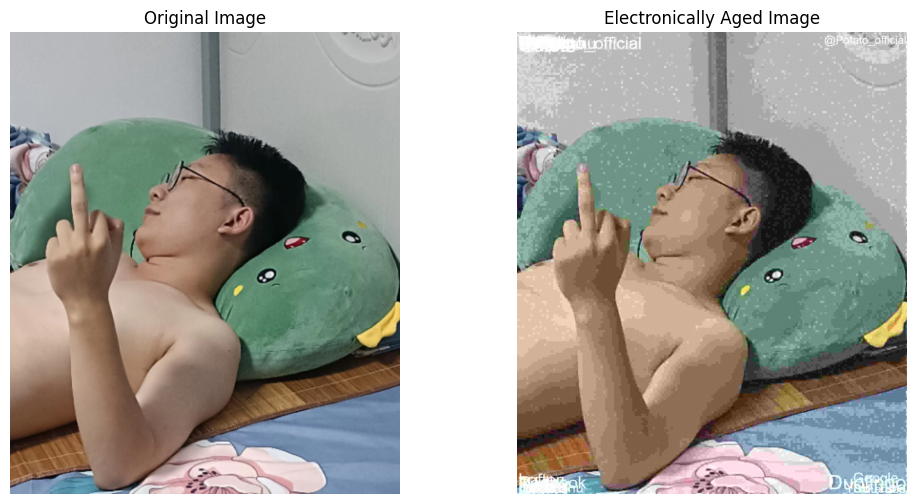

In [2]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import io
import random
import matplotlib.pyplot as plt

def add_noise(image_array, noise_level):
    """添加噪点"""
    noise = np.random.randint(-noise_level/10, noise_level, image_array.shape).astype('int16')
    noisy_array = np.clip(image_array.astype('int16') + noise, 0, 255).astype('uint8')
    return noisy_array

def jpeg_compression(image_array, quality):
    """JPEG压缩模拟"""
    image = Image.fromarray(image_array)
    compressed_io = io.BytesIO()
    image.save(compressed_io, format='JPEG', quality=quality)
    compressed_io.seek(0)
    compressed_image = Image.open(compressed_io)
    return np.array(compressed_image)

def add_watermark(image_array, text):
    """添加水印"""
    image = Image.fromarray(image_array)
    draw = ImageDraw.Draw(image)

    fontsizes = [50, 55, 60, 65, 45, 40, 70]
    fontsize = random.choice(fontsizes)

    try:
        font = ImageFont.truetype("ARIAL.TTF", size=fontsize)
    except IOError:
        font = ImageFont.load_default()

    # 获取文本的宽度和高度
    textwidth, textheight = draw.textsize(text, font)

    # 计算文本的位置
    width, height = image.size
    paddings = [0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
    padding = random.choice(paddings)
    positions = [(5, 5), (5, 5), (5, 5),
     (5, height - textheight - padding), (5, height - textheight - padding),
      (width - textwidth - padding, 5),
       (width - textwidth - padding, height - textheight - padding), (width - textwidth - padding, height - textheight - padding)]
    position = random.choice(positions)

    draw.text(position, text, (255, 255, 255), font=font)  # 使用白色文字
    return np.array(image)

def electronic_baogua_generator(image_path, output_path, iterations=30, noise_level=16, quality=6):
    """电子包浆生成器"""
    original_image = Image.open(image_path)
    image_array = np.array(original_image)

    watermarks = ["@Potato_official", "bilibili", "YouTube", "weibo", "DaFanshu", "Redbook", "Tiktok", "Lofter", "Duolingo", "Baidu", "Google", "Wechat"]

    for i in range(iterations):
        watermark_text = random.choice(watermarks)
        image_array = add_watermark(image_array, watermark_text)

        image_array = jpeg_compression(image_array, quality)
        image_array = add_noise(image_array, noise_level)

    final_image = Image.fromarray(image_array)
    final_image.save(output_path)

    return final_image

# 使用函数并展示原图与处理后的图像
def display_images(original_image_path, output_path):
    original_image = Image.open(original_image_path)
    baogua_image = electronic_baogua_generator(original_image_path, output_path)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    axes[1].imshow(baogua_image)
    axes[1].set_title("Electronically Aged Image")
    axes[1].axis('off')
    plt.show()

# 使用方法：
display_images('4.jpg', '4_pulp.jpg')
